In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
capacity = pd.read_csv(r"data/capacity.csv")

In [4]:
capacity.head()

,Unnamed: 0,country,ccode,year,Capacity,demo,lnpop,lngdp,polity2
0,1,United States,2,1960,1.057516,1,12.104439,9.335032,1.0
1,2,United States,2,1961,1.097704,1,12.121016,9.341544,1.0
2,3,United States,2,1962,1.166599,1,12.136395,9.384714,1.0
3,4,United States,2,1963,1.088806,1,12.150787,9.412628,1.0
4,5,United States,2,1964,1.073878,1,12.164678,9.455089,1.0


In [5]:
turnout = pd.read_csv(r"data/turnout.csv")

In [6]:
def paneltreatment(data,treatment_var,x_var,y_var,mode="treatment_bi",cmp = ['#3D71A0', '#B70050']):
    '''
    data: pandas dataframe
    treatment_var: treatmen
    x_var: x axis (often year)
    y_var: categories 
    mode: missing,treatment_bi 
    '''
    ## treatment matrix list
    treatment_ma = data.pivot_table(columns=x_var, index=y_var, values=treatment_var)
    if mode == "missing":
            treatment_ma[~treatment_ma.isnull()] = 1  # not nan
            treatment_ma[treatment_ma.isnull()] = 0   # nan
    
    ## set x and y
    x = len(set(data[x_var]))
    y = len(set(data[y_var]))
    xlb = sorted(list(set(data[x_var])))
    ylb = sorted(list(set(data[y_var])))
    
    ## draw plots 
    fig, ax = plt.subplots(constrained_layout=True,figsize=(10,10),dpi=400)
    cmap = matplotlib.colors.ListedColormap(cmp)
    ax.set_facecolor('white')
    ax.imshow(treatment_ma, cmap=cmap, origin="lower", extent=(0,x,0,y))
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=.1)
    
    ## set labels 
    ax.set_xticks(np.arange(0, x, 1))
    ax.set_yticks(np.arange(0, y, 1))
    ax.set_yticklabels(ylb,rotation=0, fontsize=2)
    ax.set_xticklabels(xlb,rotation=90, fontsize=2)

    return(fig)

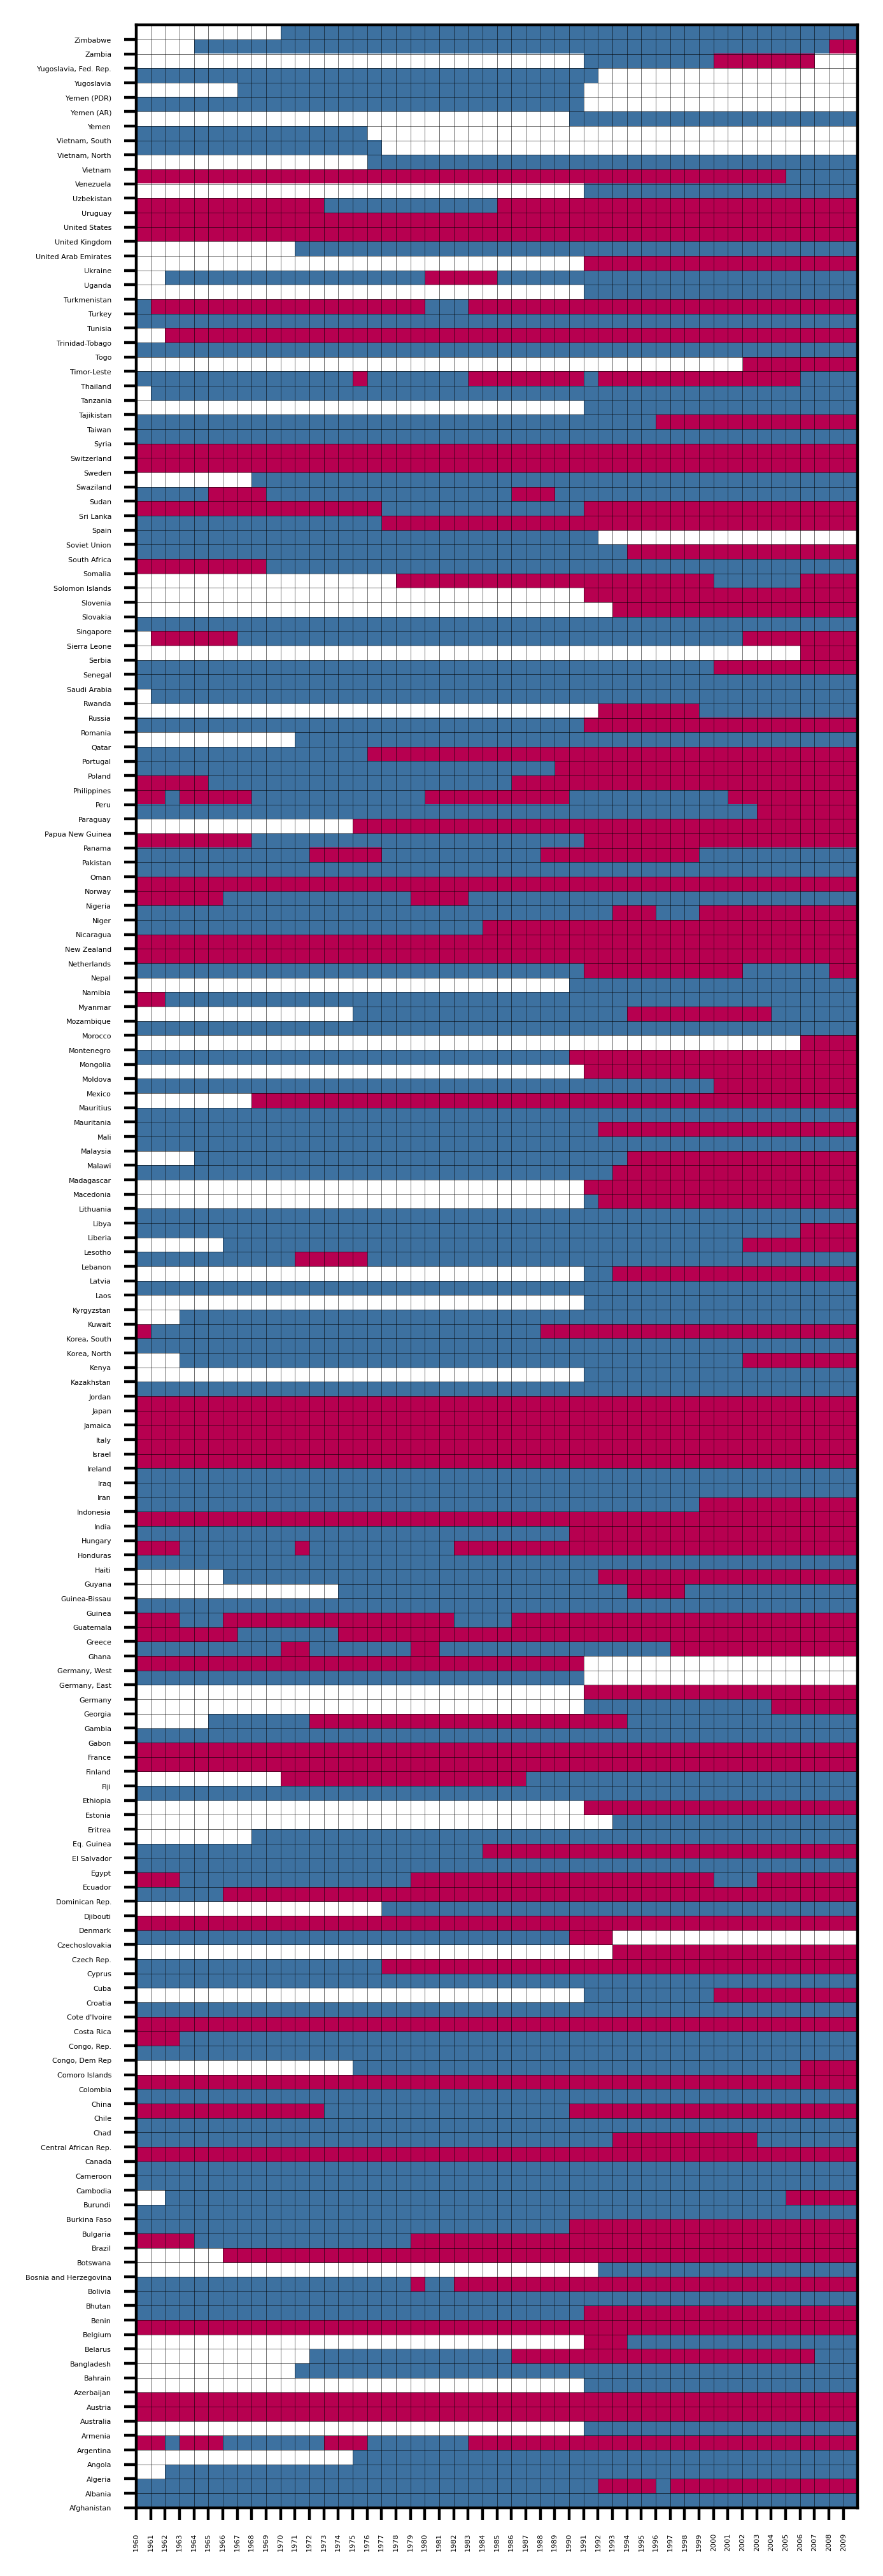

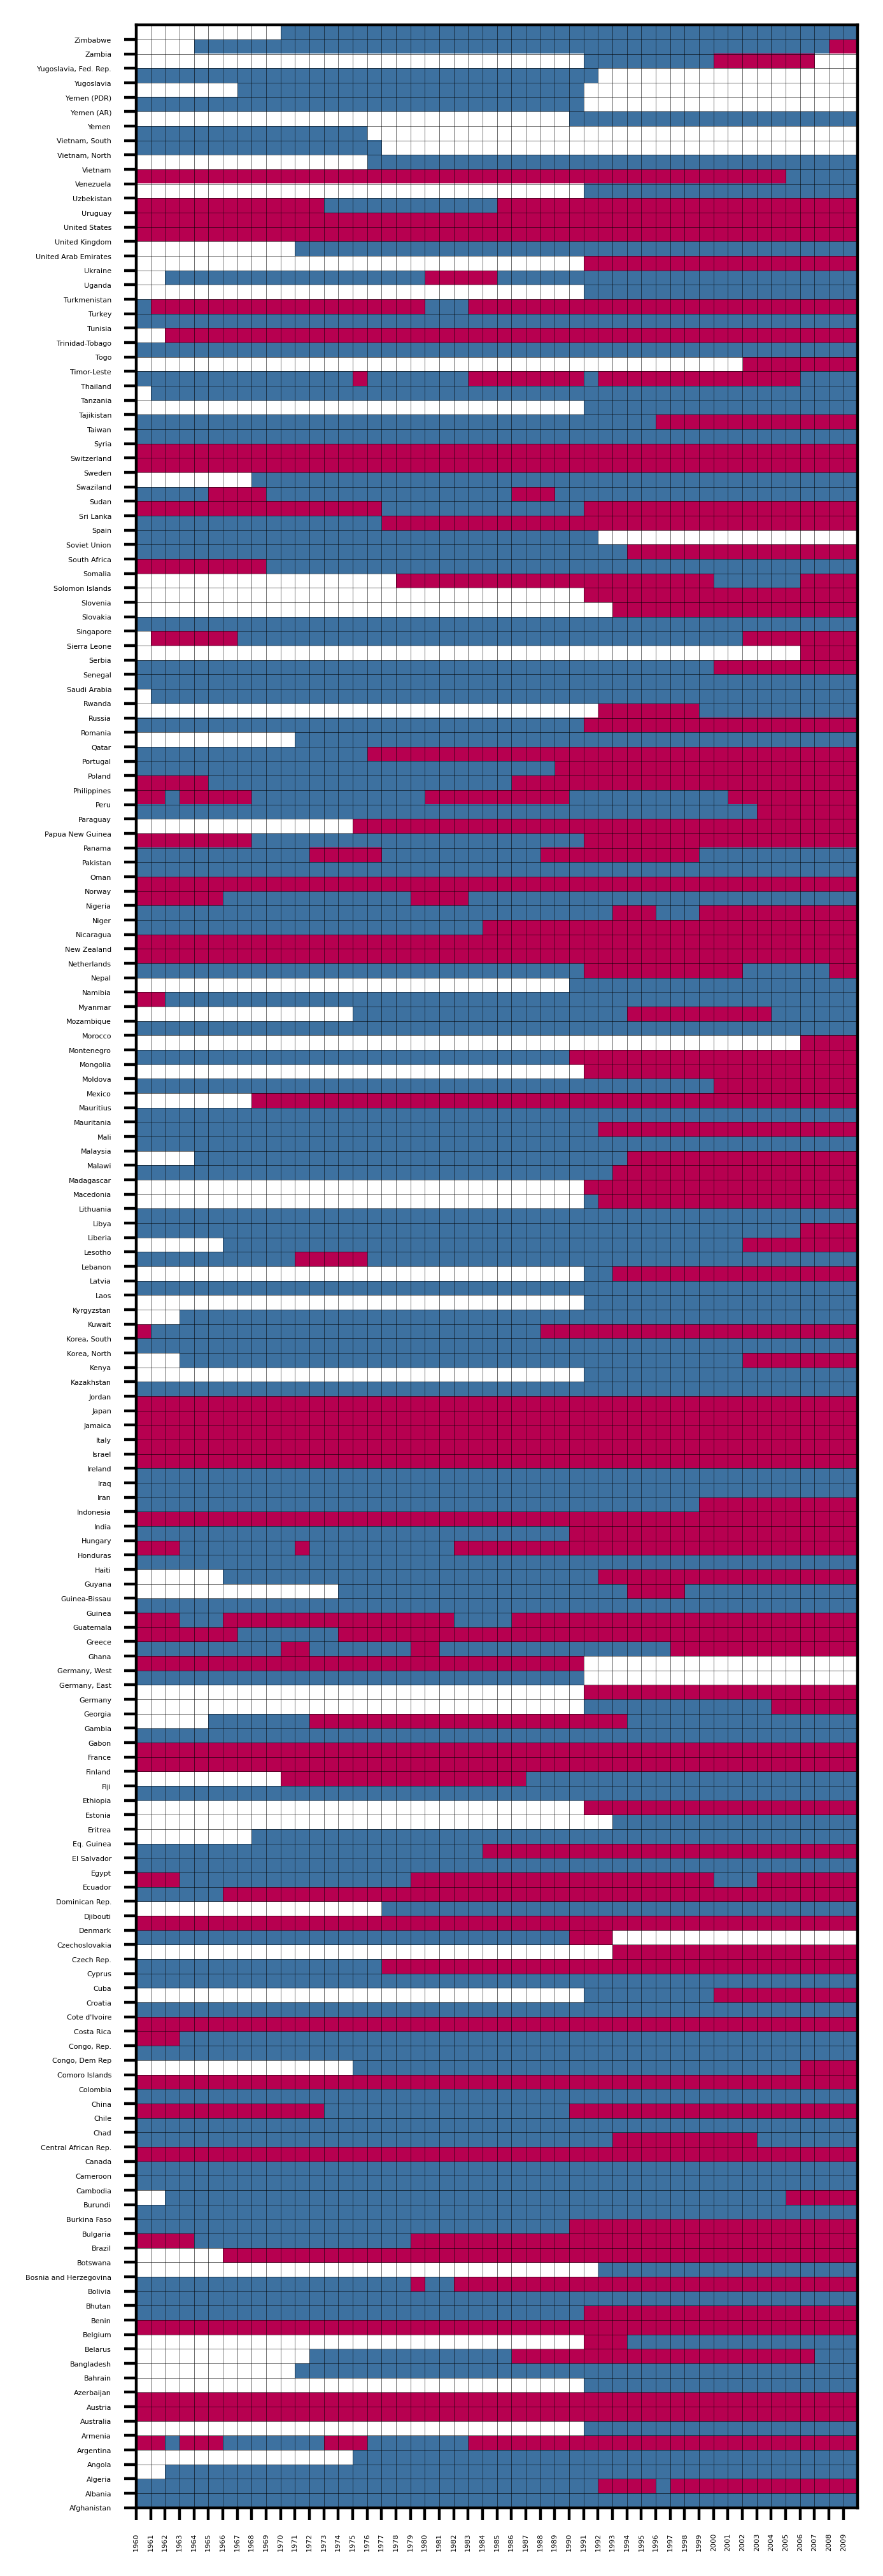

In [7]:
paneltreatment(capacity,'demo','year','country','treatment_bi')

In [10]:
def panellines(data,formula,mode="treat",colormap = ['#B5D4E9', '#E4B4B4']):
    '''
    data: pandas dataframe
    formula: string, 
        if mode = treat,formula is  outcome~treatment + category + x_var
        if mode = notreat,formula is  outcome~ category + x_var
    outcome: also the y axis
    treatment: pre and post treatment color will be different for a line
    category: set as different lines 
    x_var: x axis (often year)
    mode: treat or no treat
    '''
    ## get variables from formula
    outcome = formula.split("~")[0]
    if mode == "treat":
        treatment = formula.split("~")[1].split("+")[0]
        category = formula.split("~")[1].split("+")[1]
        x_var = formula.split("~")[1].split("+")[2]
    elif mode == "notreat":
        treatment = None
        category = formula.split("~")[1].split("+")[0]
        x_var = formula.split("~")[1].split("+")[1]    
    
    ## new dataframe 
    df = data[[outcome,treatment,category,x_var]].sort_values([category],ascending=True)
    
    #line_names = sorted(list(df_dic.keys()))
    if treatment:
        
        ## categories with treatment 
        ## categories without treatment
        cate_treat = sorted(set(data[data[treatment]==1][category]))
        cate_notreat = sorted(set(data[data[treatment]==0][category]))

        ## dataframe dictionary,then set x and y 
        df_dic_treat = {k: v for k, v in df.groupby(category) if k in cate_treat}
        df_dic_con = {k: v for k, v in df.groupby(category)if k in cate_notreat}
        
        ###control group
        x_control_val_li = [d.sort_values(by=x_var, ascending=True)[x_var] for d in df_dic_con.values()]
        y_control_val_li = [d.sort_values(by=x_var, ascending=True)[outcome] for d in df_dic_con.values()]
        
        ###treat group 
        #x_treat_val_li = [d.sort_values(by=x_var, ascending=True)[x_var] for d in df_dic_treat.values()]
        #y_treat_val_li = [d.sort_values(by=x_var, ascending=True)[outcome] for d in df_dic_treat.values()]
        ###before treat
        x_treat_val_li_bf = [d.sort_values(by=x_var, ascending=True)[d[treatment]==0][x_var] for d in df_dic_treat.values()]
        y_treat_val_li_bf = [d.sort_values(by=x_var, ascending=True)[d[treatment]==0][outcome] for d in df_dic_treat.values()]
        ###after treat
        x_treat_val_li_af = [d.sort_values(by=x_var, ascending=True)[d[treatment]==1][x_var] for d in df_dic_treat.values()]
        y_treat_val_li_af = [d.sort_values(by=x_var, ascending=True)[d[treatment]==1][outcome] for d in df_dic_treat.values()]
        
        ## draw plots:control
        fig, ax = plt.subplots(figsize=(15,10),dpi=400)
        for x,y in zip(x_control_val_li,y_control_val_li):
            ax.plot(x,y,color="#CCD1D1")

        ## draw plots: treatments
        for x,y in zip(x_treat_val_li_bf,y_treat_val_li_bf):
            ax.plot(x,y,color=colormap[0])
        
        for x,y in zip(x_treat_val_li_af,y_treat_val_li_af):
            ax.plot(x,y,color=colormap[1])
                 
    else:
        df_dic = {k: v for k, v in df.groupby(category)}
        x_val_li = [d.sort_values(by=x_var, ascending=True)[x_var] for d in df_dic.values()]
        y_val_li = [d.sort_values(by=x_var, ascending=True)[outcome] for d in df_dic.values()]
        
        ### draw plots
        fig, ax = plt.subplots(figsize=(15,10),dpi=400)
        for x,y in zip(x_val_li,y_val_li):
            ax.plot(x,y,color="#E9967A")

    ## set labels 
#     ax.set_xticks(np.arange(0, x, 1))
#     ax.set_yticks(np.arange(0, y, 1))
#     ax.set_yticklabels(ylb,rotation=0, fontsize=2)
#     ax.set_xticklabels(xlb,rotation=90, fontsize=2)
    return(fig)

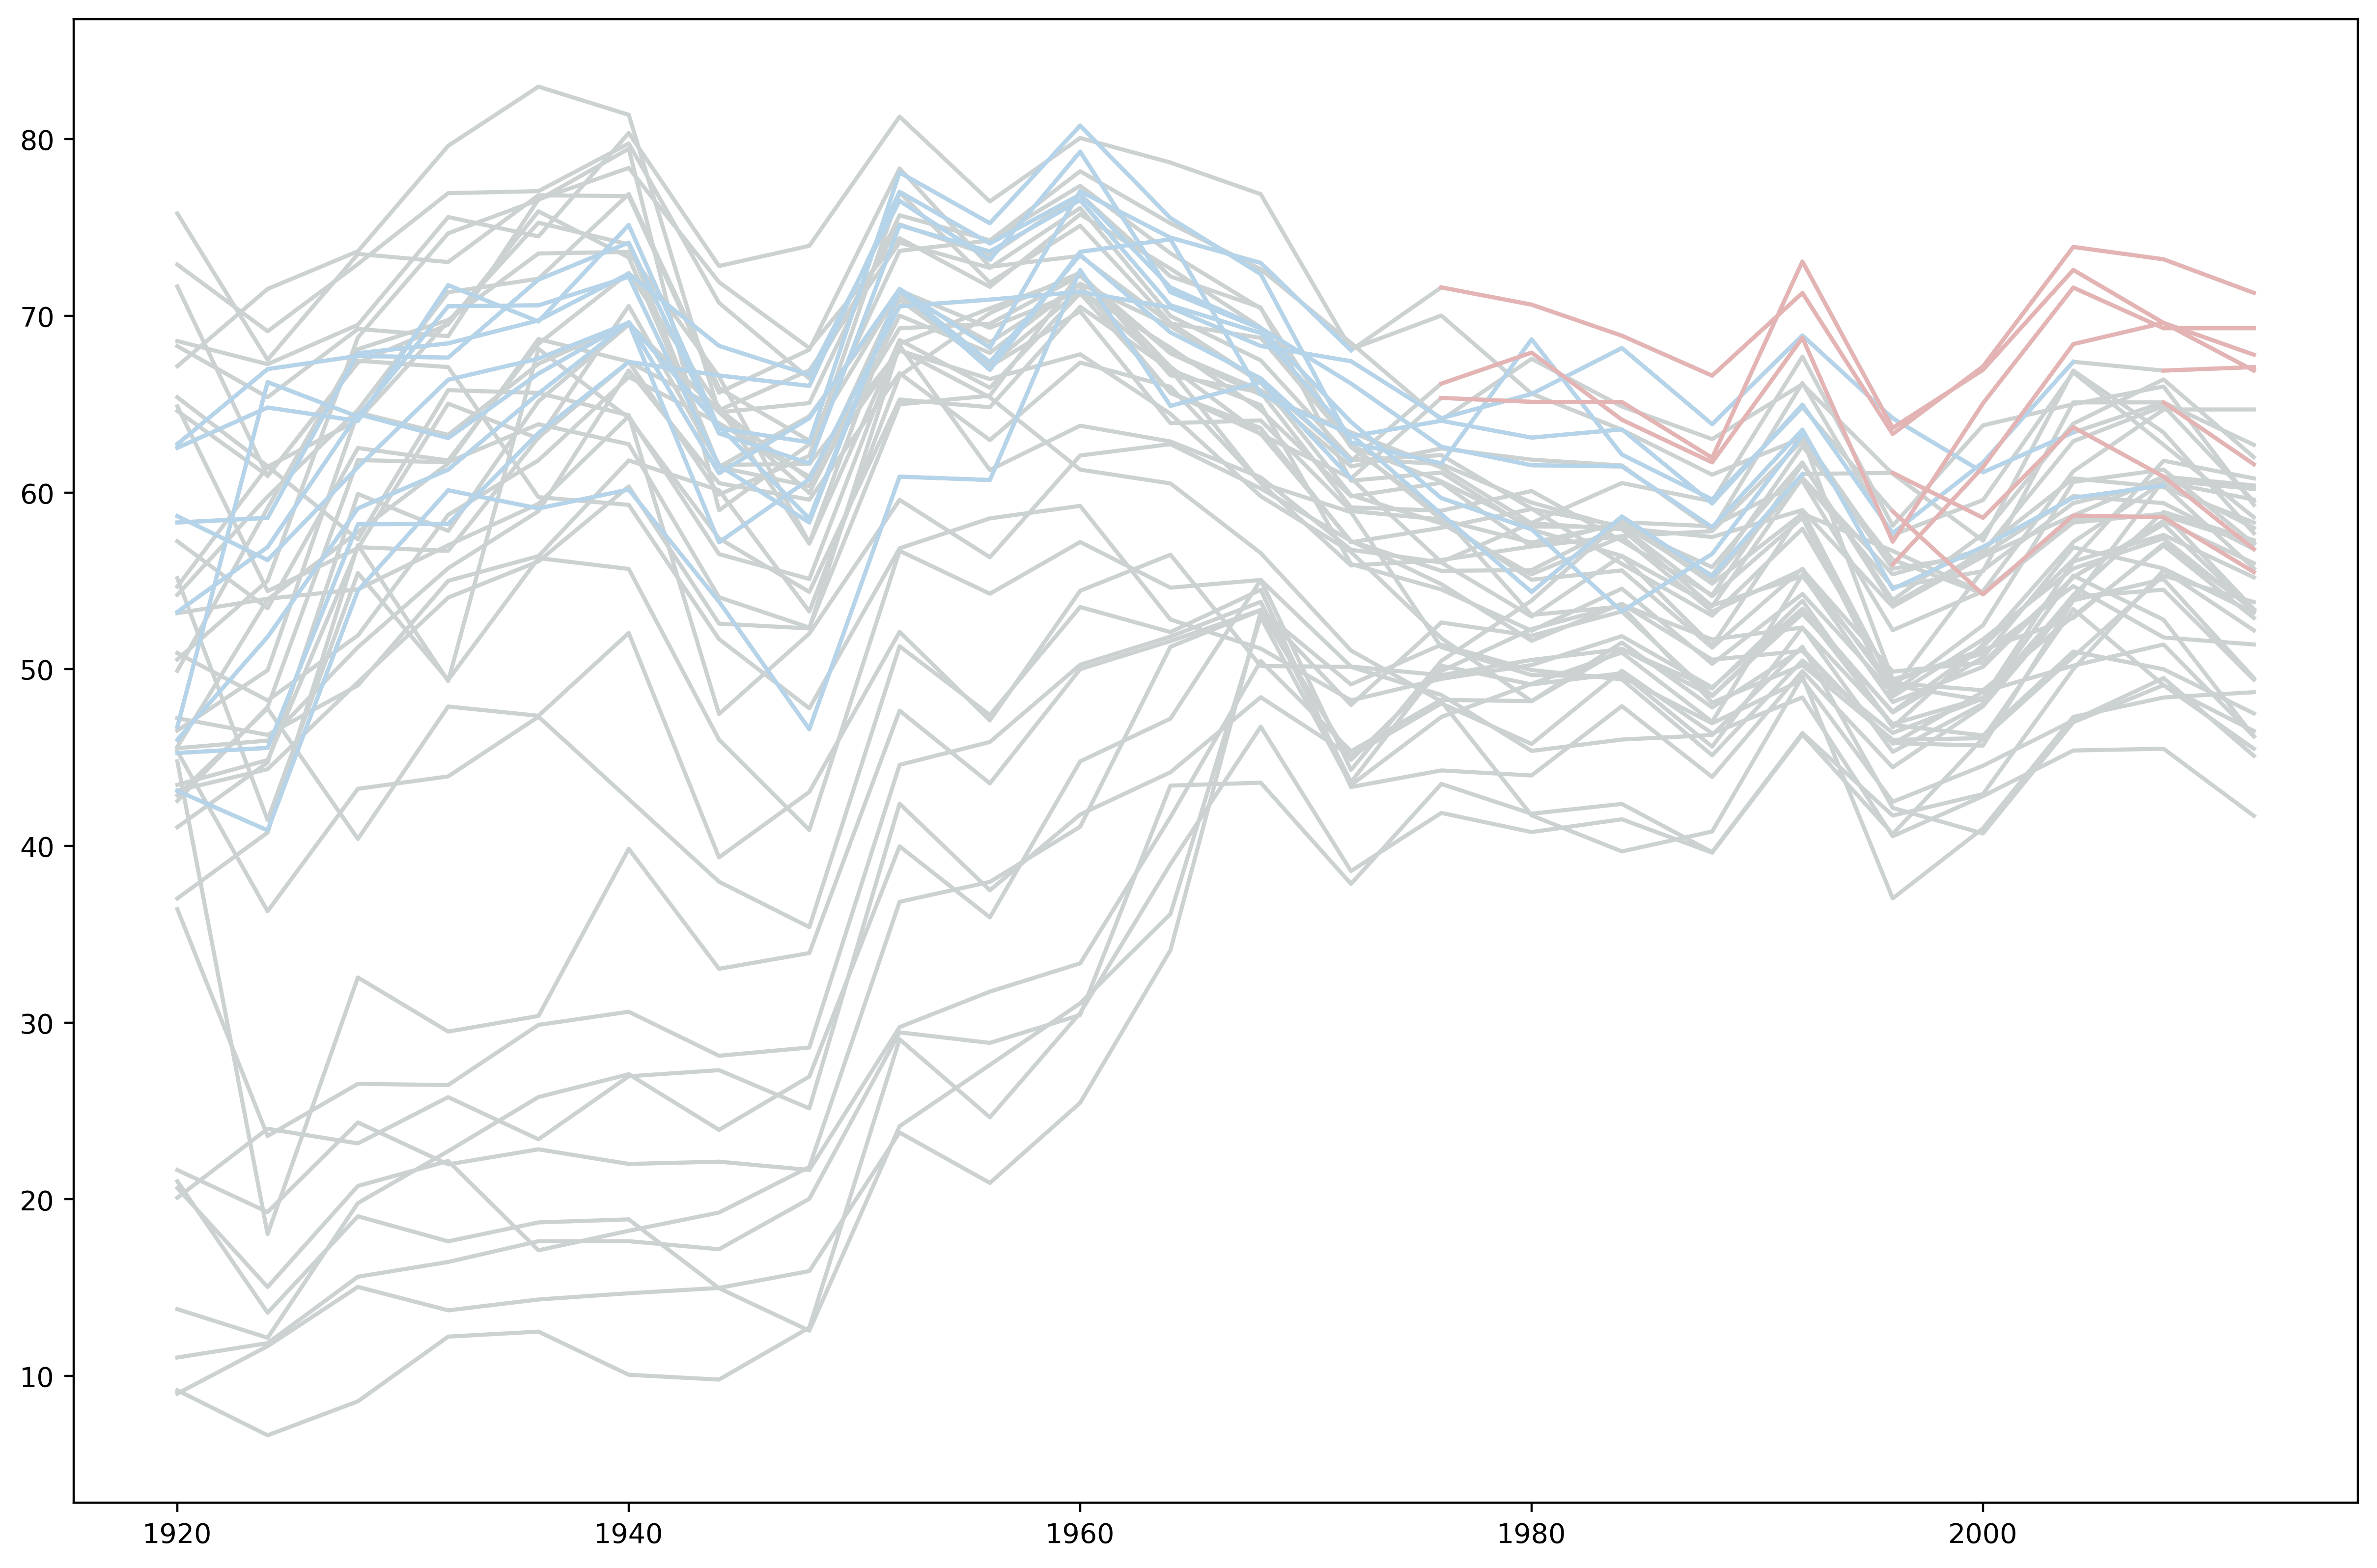

In [11]:
p = panellines(turnout,"turnout~policy_edr+abb+year")